# Exploratory Analysis of Airbnb and ACS Data on Housing, Nashville, TN

This notebook is designed to explore assets related to data from InsideAirbnb and the U.S. American Community Census Datasets for Nashville, Tennessee.
The primary goal of this analysis is to determine factors related to rental supply as it relates to Airbnb. 

## Table of Contents

<ol>
    <li>Chapter 1 - Airbnb Listing  
    <li>Chapter 2 - Exploring Decennial Census Occupancy Status  
    <li>Chapter 3 - Exploring Decennial Census Racial Characteristics
    <li>Chapter 4 - Joins and Relates 


In [1]:
# import libraries
import geopandas as gpd 
import pandas as pd 
import matplotlib.pyplot as plt 

### Chapter 1 - Airbnb Listings

This chapter explores InsideAirbnb's datasets for Nashville, Tn. 

In [2]:
# read in files 
listings = gpd.read_file("../shp/listings_reprojected.shp");
blocks = gpd.read_file("../shp/nashville_blocks_wgs.shp")
decennial_occupancy = pd.read_csv("../tables/nashville_census/decennial_occupancy/DECENNIALPL2020.H1_data_with_overlays_2021-12-15T142048.csv")
decennial_race = pd.read_csv("../tables/nashville_census/decennial_race/DECENNIALPL2020.P1_data_with_overlays_2022-02-11T032215.csv")
#calendar = gpd.read_file("./nashville_airbnb/calendar.csv")

C:\Users\Nate\AppData\Local\Temp\ipykernel_8048\3688018941.py:5: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  decennial_race = pd.read_csv("../tables/nashville_census/decennial_race/DECENNIALPL2020.P1_data_with_overlays_2022-02-11T032215.csv")


In [3]:
type(blocks)

geopandas.geodataframe.GeoDataFrame

In [4]:
# First, let's set max columns display for geopandas
pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows', 100)

# Adding the plt parameters for charting size 
plt.rcParams['figure.figsize'] = (9, 9)

<AxesSubplot:>

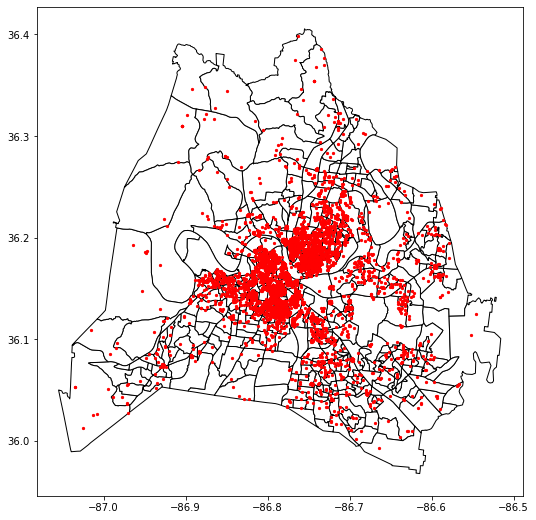

In [5]:
fig, ax = plt.subplots()

blocks.plot(ax=ax, color='white', edgecolor='black');
listings.plot(ax=ax, marker='o', color='red', markersize=5)

Above is a quick map of all Airbnb listings in Davidson County, TN. The high density is primarily on the North and South banks of the Cumberland River. 

# Decennial Census Data - Housing Occupancy 

In this chapter, I'll explore the 2020 Decennial Census' H1 table concerning occupancy status by block groups in Nashville. The purpose of this section is to understand what the occupancy characteristics are and begin to understand which block groups are heavily occupied and which ones are vacant. Additionally, at the end of this chapter, I'll join this table to the Tiger/Line shapefile of census block groups so that I can begin to consolidate the datasets into useable shapefiles. 

In [6]:
blocks.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,037,010901,2,470370109012,Block Group 2,G5030,S,2518120,0,+36.2607277,-086.7476646,"POLYGON ((-86.75793 36.25642, -86.75792 36.256..."
1,47,037,010201,3,470370102013,Block Group 3,G5030,S,4674298,0,+36.2804913,-086.7390472,"POLYGON ((-86.75534 36.26998, -86.75503 36.270..."
2,47,037,010401,1,470370104011,Block Group 1,G5030,S,2274536,51469,+36.2764938,-086.6929903,"POLYGON ((-86.71149 36.27290, -86.71120 36.273..."
3,47,037,010401,2,470370104012,Block Group 2,G5030,S,1975643,0,+36.2883438,-086.7025313,"POLYGON ((-86.71039 36.27619, -86.71021 36.276..."
4,47,037,010501,1,470370105011,Block Group 1,G5030,S,988912,0,+36.2611232,-086.6545283,"POLYGON ((-86.66204 36.26335, -86.66122 36.263..."


In [7]:
decennial_occupancy.head()

,GEO_ID,NAME,H1_001N,H1_002N,H1_003N
0,id,Geographic Area Name,!!Total:,!!Total:!!Occupied,!!Total:!!Vacant
1,1000000US470370101031000,"Block 1000, Block Group 1, Census Tract 101.03...",9,2,7
2,1000000US470370101031001,"Block 1001, Block Group 1, Census Tract 101.03...",36,36,0
3,1000000US470370101031002,"Block 1002, Block Group 1, Census Tract 101.03...",35,29,6
4,1000000US470370101031003,"Block 1003, Block Group 1, Census Tract 101.03...",76,65,11


In [8]:
decennial_occupancy = decennial_occupancy.iloc[1: , :]

In [9]:
# check data types of decennial data
decennial_occupancy.dtypes

GEO_ID     object
NAME       object
H1_001N    object
H1_002N    object
H1_003N    object
dtype: object

In [10]:
# convert the total, occupied, and vacancy fields to integer types
decennial_occupancy['H1_001N'] = pd.to_numeric(decennial_occupancy['H1_001N']);
decennial_occupancy['H1_002N'] = pd.to_numeric(decennial_occupancy['H1_002N']);
decennial_occupancy['H1_003N'] = pd.to_numeric(decennial_occupancy['H1_003N']);
                                      

In [11]:
decennial_occupancy.dtypes

GEO_ID     object
NAME       object
H1_001N     int64
H1_002N     int64
H1_003N     int64
dtype: object

In [12]:
decennial_occupancy.head()

,GEO_ID,NAME,H1_001N,H1_002N,H1_003N
1,1000000US470370101031000,"Block 1000, Block Group 1, Census Tract 101.03...",9,2,7
2,1000000US470370101031001,"Block 1001, Block Group 1, Census Tract 101.03...",36,36,0
3,1000000US470370101031002,"Block 1002, Block Group 1, Census Tract 101.03...",35,29,6
4,1000000US470370101031003,"Block 1003, Block Group 1, Census Tract 101.03...",76,65,11
5,1000000US470370101031004,"Block 1004, Block Group 1, Census Tract 101.03...",96,94,2


In [13]:
# rename 'GEO_ID' column to GEOID for a join later on 
decennial_occupancy.rename(columns={'GEO_ID':'GEOID', 'H1_001N': 'pop_total', 'H1_002N': 'total_occupied', 'H1_003N': 'total_vacant'}, inplace=True)

In [14]:
# slice off the first 9 characters of the decennial data GEOID field values
decennial_occupancy['GEOID'] = decennial_occupancy['GEOID'].str[9:]

In [15]:
# slice off the last 4 characters of the decennial data GEOID field values
decennial_occupancy['GEOID'] = decennial_occupancy['GEOID'].str[:-3]

In [16]:
decennial_occupancy.head()

,GEOID,NAME,pop_total,total_occupied,total_vacant
1,470370101031,"Block 1000, Block Group 1, Census Tract 101.03...",9,2,7
2,470370101031,"Block 1001, Block Group 1, Census Tract 101.03...",36,36,0
3,470370101031,"Block 1002, Block Group 1, Census Tract 101.03...",35,29,6
4,470370101031,"Block 1003, Block Group 1, Census Tract 101.03...",76,65,11
5,470370101031,"Block 1004, Block Group 1, Census Tract 101.03...",96,94,2


In [30]:
# create percentage fields for percent of the block group that is occupied and percent of the block group that is vacant
decennial_occupancy['percent_occupied'] = (decennial_occupancy["total_occupied"] / decennial_occupancy["pop_total"]) * 100;
decennial_occupancy['percent_vacant'] = (decennial_occupancy["total_vacant"] / decennial_occupancy["pop_total"]) * 100;


In [31]:
decennial_occupancy.head()

,GEOID,NAME,pop_total,total_occupied,total_vacant,percent_occupied,percent_vacant
1,470370101031,"Block 1000, Block Group 1, Census Tract 101.03...",9,2,7,22.222222,77.777778
2,470370101031,"Block 1001, Block Group 1, Census Tract 101.03...",36,36,0,100.000000,0.000000
3,470370101031,"Block 1002, Block Group 1, Census Tract 101.03...",35,29,6,82.857143,17.142857
4,470370101031,"Block 1003, Block Group 1, Census Tract 101.03...",76,65,11,85.526316,14.473684
5,470370101031,"Block 1004, Block Group 1, Census Tract 101.03...",96,94,2,97.916667,2.083333


## Attribute Join: Occupancy Status Table to Tiger/Line Block Group Shapefile

Below, we'll join the decennial occupancy status table to the tiger/line block group shapefile

In [18]:
blocks.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,037,010901,2,470370109012,Block Group 2,G5030,S,2518120,0,+36.2607277,-086.7476646,"POLYGON ((-86.75793 36.25642, -86.75792 36.256..."
1,47,037,010201,3,470370102013,Block Group 3,G5030,S,4674298,0,+36.2804913,-086.7390472,"POLYGON ((-86.75534 36.26998, -86.75503 36.270..."
2,47,037,010401,1,470370104011,Block Group 1,G5030,S,2274536,51469,+36.2764938,-086.6929903,"POLYGON ((-86.71149 36.27290, -86.71120 36.273..."
3,47,037,010401,2,470370104012,Block Group 2,G5030,S,1975643,0,+36.2883438,-086.7025313,"POLYGON ((-86.71039 36.27619, -86.71021 36.276..."
4,47,037,010501,1,470370105011,Block Group 1,G5030,S,988912,0,+36.2611232,-086.6545283,"POLYGON ((-86.66204 36.26335, -86.66122 36.263..."


In [19]:
# check data type of blocks
type(blocks)

geopandas.geodataframe.GeoDataFrame

In [20]:
blocks.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
BLKGRPCE      object
GEOID         object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [21]:
# join the decennial table into our blocks shapefile
blocks= blocks.merge(decennial_occupancy, on="GEOID")

In [22]:
type(blocks)

geopandas.geodataframe.GeoDataFrame

In [23]:
blocks.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME,pop_total,total_occupied,total_vacant,percent_occupied
0,47,037,010901,2,470370109012,Block Group 2,G5030,S,2518120,0,+36.2607277,-086.7476646,"POLYGON ((-86.75793 36.25642, -86.75792 36.256...","Block 2000, Block Group 2, Census Tract 109.01...",0,0,0,NaN
1,47,037,010901,2,470370109012,Block Group 2,G5030,S,2518120,0,+36.2607277,-086.7476646,"POLYGON ((-86.75793 36.25642, -86.75792 36.256...","Block 2001, Block Group 2, Census Tract 109.01...",35,35,0,100.000000
2,47,037,010901,2,470370109012,Block Group 2,G5030,S,2518120,0,+36.2607277,-086.7476646,"POLYGON ((-86.75793 36.25642, -86.75792 36.256...","Block 2002, Block Group 2, Census Tract 109.01...",42,42,0,100.000000
3,47,037,010901,2,470370109012,Block Group 2,G5030,S,2518120,0,+36.2607277,-086.7476646,"POLYGON ((-86.75793 36.25642, -86.75792 36.256...","Block 2003, Block Group 2, Census Tract 109.01...",62,57,5,91.935484
4,47,037,010901,2,470370109012,Block Group 2,G5030,S,2518120,0,+36.2607277,-086.7476646,"POLYGON ((-86.75793 36.25642, -86.75792 36.256...","Block 2004, Block Group 2, Census Tract 109.01...",11,11,0,100.000000


In [24]:
# rename the decennial census field names to something more readable
blocks = blocks.rename(columns={'H1_001N': 'pop_total', 'H1_002N': 'total_occupied', 'H1_003N': 'total_vacant'})

In [25]:
blocks.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,NAME,pop_total,total_occupied,total_vacant,percent_occupied
0,47,037,010901,2,470370109012,Block Group 2,G5030,S,2518120,0,+36.2607277,-086.7476646,"POLYGON ((-86.75793 36.25642, -86.75792 36.256...","Block 2000, Block Group 2, Census Tract 109.01...",0,0,0,NaN
1,47,037,010901,2,470370109012,Block Group 2,G5030,S,2518120,0,+36.2607277,-086.7476646,"POLYGON ((-86.75793 36.25642, -86.75792 36.256...","Block 2001, Block Group 2, Census Tract 109.01...",35,35,0,100.000000
2,47,037,010901,2,470370109012,Block Group 2,G5030,S,2518120,0,+36.2607277,-086.7476646,"POLYGON ((-86.75793 36.25642, -86.75792 36.256...","Block 2002, Block Group 2, Census Tract 109.01...",42,42,0,100.000000
3,47,037,010901,2,470370109012,Block Group 2,G5030,S,2518120,0,+36.2607277,-086.7476646,"POLYGON ((-86.75793 36.25642, -86.75792 36.256...","Block 2003, Block Group 2, Census Tract 109.01...",62,57,5,91.935484
4,47,037,010901,2,470370109012,Block Group 2,G5030,S,2518120,0,+36.2607277,-086.7476646,"POLYGON ((-86.75793 36.25642, -86.75792 36.256...","Block 2004, Block Group 2, Census Tract 109.01...",11,11,0,100.000000


# Chapter 3: Exploring Decennial Census Racial Characteristics

In [26]:
decennial_race.head()

,GEO_ID,NAME,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_009N,P1_010N,P1_011N,P1_012N,P1_013N,P1_014N,P1_015N,P1_016N,P1_017N,P1_018N,P1_019N,P1_020N,P1_021N,P1_022N,P1_023N,P1_024N,P1_025N,P1_026N,P1_027N,P1_028N,P1_029N,P1_030N,P1_031N,P1_032N,P1_033N,P1_034N,P1_035N,P1_036N,P1_037N,P1_038N,P1_039N,P1_040N,P1_041N,P1_042N,P1_043N,P1_044N,P1_045N,P1_046N,P1_047N,P1_048N,P1_049N,P1_050N,P1_051N,P1_052N,P1_053N,P1_054N,P1_055N,P1_056N,P1_057N,P1_058N,P1_059N,P1_060N,P1_061N,P1_062N,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two 